<a href="https://colab.research.google.com/github/fedhere/DSPS_FBianco/blob/main/Labs/in_class_DIYMCMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Simple-line-fit-with-MCMC" data-toc-modified-id="Simple-line-fit-with-MCMC-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simple line fit with MCMC</a></div><div class="lev1 toc-item"><a href="#Model:-a-line-mx-+-b" data-toc-modified-id="Model:-a-line-mx-+-b-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model: a line <em>mx + b</em></a></div><div class="lev1 toc-item"><a href="#prior" data-toc-modified-id="prior-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>prior</a></div><div class="lev1 toc-item"><a href="#likelihood" data-toc-modified-id="likelihood-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>likelihood</a></div><div class="lev1 toc-item"><a href="#DYI-Metropolis-Hasting" data-toc-modified-id="DYI-Metropolis-Hasting-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>DYI Metropolis Hasting</a></div><div class="lev2 toc-item"><a href="#Run-the-code-with-different-chain-lengths-to-see-how-the-MCMC-explores-the-parameter-space" data-toc-modified-id="Run-the-code-with-different-chain-lengths-to-see-how-the-MCMC-explores-the-parameter-space-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Run the code with different chain lengths to see how the MCMC explores the parameter space</a></div><div class="lev1 toc-item"><a href="#Affine-Invariant-MCMC-sample-(with-emcee)" data-toc-modified-id="Affine-Invariant-MCMC-sample-(with-emcee)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Affine Invariant MCMC sample (with emcee)</a></div><div class="lev1 toc-item"><a href="#Comparison-with-analytical-solution" data-toc-modified-id="Comparison-with-analytical-solution-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Comparison with analytical solution</a></div><div class="lev1 toc-item"><a href="#Test-convergence-by-looking-at-the-autocorrelation" data-toc-modified-id="Test-convergence-by-looking-at-the-autocorrelation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Test convergence by looking at the autocorrelation</a></div><div class="lev1 toc-item"><a href="#Increase-the-steps-in-the-chain" data-toc-modified-id="Increase-the-steps-in-the-chain-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Increase the steps in the chain</a></div>

# Simple line fit with MCMC

In [ ]:
!pip install corner

In [ ]:
!pip install emcee

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.4 MB/s eta 0:00:00


In [ ]:
from __future__ import print_function, division
import pylab as pl
import  corner
import emcee
import scipy
from scipy.stats import norm

%pylab inline

pl.rcParams['figure.figsize']= (10,10)
pl.rcParams['font.size'] = 18

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.12/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Model: a line *mx + b*

In [ ]:
def line(m, b, x):
...

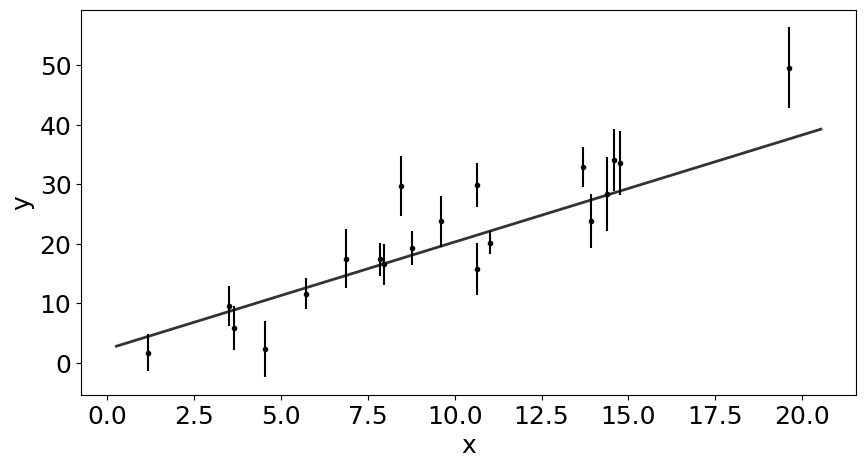

Figure 1: a line generative model and the data it generates with Poisson errors augmented by Gaussian errors


In [ ]:
# Choose the "true" parameters.
m_true = 1.8
b_true = 2.3

# Generate some synthetic data from the model.
N = 20
np.random.seed(123)
...

To get

$P(\theta \mid D,f)$

from Bayes theorem

$P(\theta \mid D,f)\quad \propto { { \quad P(D\mid \theta ,f)\, P(\theta ,f) } } $

I need $ { { \quad P(D\mid \theta ,f)\, P(\theta ,f) } } $

NEXT STEP: define Prior $ P(\theta ,f)$ and Likelihood $\quad P(D\mid \theta ,f)$

# prior

In [ ]:
# what do I know about my model? e.g. the slope should be between 0 and 90 degree
def lnprior(theta):
    ...

# likelihood

In [ ]:
#remember the chi square:
# Sum((model - data)/error)^2 is a quantity that follows a chi square distribution with N=number of degreed of freedom.
# Divide it by the number of degreed  of freedom as Chisq = (Sum((model - data)/error)^2)/DOF
# If it is ~1 that is a good model.
# >1 bad model
# <1 your errors must be underestimated (model too good to be true!)

def lnlike(theta, x, y, yerr):
    ...

# DYI Metropolis Hasting

In [ ]:
#first pass get theta_current, theta_proposal from a normal rvs, get the bayesian posterior of theta_current and theta_proposal

np.random.seed(666)
theta_current = (


theta_0 =  [2.62418808 2.779966  ]
theta_1 =  [2.85888169 2.96177562]
-52.80280241581931
-84.1863619955718


In [ ]:
#now repeat but implement the walk
np.random.seed(666)

theta_current = (m_true, b_true) + np.random.randn(2)

# we start the walk here
walk = [theta_current]
... #(the rest is the same)
if ... :
  walk += ...

## Run the chain to see how the MCMC explores the parameter space
The simple algorithm coded below runs an MCMC with a single chain. The length of the chain is controlled by the parameter N


In [ ]:
N = 10_000 #number of steps in my chain

# move along the walk N = 100, 1000 steps
np.random.seed(666)
...
m_mcmc = np.percentile(np.array(walk)[:,0], [50, 16, 84])
b_mcmc = np.percentile(np.array(walk)[:,1], [50, 16, 84])
mcmcRes = np.concatenate([m_mcmc, b_mcmc])
print ("MCMC result:\nslope\t\t{0:+.2f} ({1:.2f}, {2:.2f})\nintercept\t{3:.2f} ({4:.2f}, {5:.2f})".format(*mcmcRes))

/tmp/ipython-input-2725448728.py:37: RuntimeWarning: invalid value encountered in scalar divide
  p_accept = (lnpost_proposal / lnpost_current)


MCMC result:
slope		+3.12 (0.87, 5.96)
intercept	-3.82 (-8.52, -0.16)


In [ ]:
#the walk should be Nx2
walk

[array([2.62418808, 2.779966  ]),
 array([2.85888169, 2.96177562]),
 array([2.85180934, 2.9218932 ]),
 array([2.5658949 , 2.92958713]),
 array([2.41170939, 3.05216626]),
 array([2.19877517, 3.2589967 ]),
 array([2.02239082, 3.50965078]),
 array([2.02799416, 3.59136222]),
 array([1.67666912, 3.76028874]),
 array([1.73211309, 3.93086905]),
 array([1.77103301, 4.19299659]),
 array([1.62517537, 4.4648471 ]),
 array([1.4850522 , 4.60227469]),
 array([1.24307167, 4.59303815]),
 array([1.12081142, 4.42868785]),
 array([0.75734792, 4.14918002]),
 array([0.56038954, 3.87872366]),
 array([0.69448762, 4.02010986]),
 array([0.9804181 , 3.93729584]),
 array([0.71507356, 3.90753546]),
 array([0.90425824, 4.14835366]),
 array([0.81401009, 3.83086436]),
 array([0.82742402, 3.51265873]),
 array([0.2084499 , 4.19136208]),
 array([0.30344   , 4.18051918]),
 array([0.48180271, 4.3742529 ]),
 array([0.60796001, 4.19614892]),
 array([0.62441405, 4.18096081]),
 array([0.71035274, 4.20412075]),
 array([0.6014

In [ ]:
# look at the sampled posterior  space
pl.figure(figsize=(10,5))
pl.plot(np.array(walk)[:,0],'k-', label="slope")
pl.legend()
pl.show()
print ("Fig 2:  slope MCMC chain")

pl.figure(figsize=(10,5))
pl.plot(np.array(walk)[:,1], 'k-', label="intercept")
pl.legend()
pl.show()
print ("Fig 3:  intercept MCMC chain")

pl.figure()
pl.hist(np.array(walk)[:,0], alpha=0.5, label="slope")

pl.hist(np.array(walk)[:,1], alpha=0.5, label="intercept")
pl.legend()
pl.show()
print ("Fig 4:  slope and intercept MCMC posterior distributions")


In [ ]:
fig = corner.corner(np.array(walk), labels=["$m$","$intercept$"],
                   truths=(m_mcmc[0], b_mcmc[0]))
pl.show()
print ("Fig 5: posterior joint distribution - generative model truth indicated in blue")

In [ ]:
# Choose the "true" parameters.
m_true = 1.8
b_true = 2.3

# Generate some synthetic data from the model.
N = 20
np.random.seed(123)
x = np.sort(np.random.rand(N) * 20)
y = line(m_true, b_true, x)
yerr = np.sqrt(y) + np.random.randn(N)
y += yerr * np.random.randn(N) * 2

ax = pl.figure(figsize=(10,5)).add_subplot(111)
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.errorbar(x, y, yerr=yerr, fmt='k.')
ax.plot(pl.xlim(), line(m_true, b_true,  np.array(pl.xlim())), 'k-', alpha=0.8, lw=2)
ax.plot(pl.xlim(), line(m_mcmc[0], b_mcmc[0],  np.array(pl.xlim())), 'r-', alpha=0.8, lw=2)

pl.show()
print ("Figure 1: a line generative model and the data it generates with Poisson errors augmented by Gaussian errors")

# Affine Invariant MCMC sample (with emcee)

The emcee package implements Affine Invariant MCMC in python

https://emcee.readthedocs.io/en/stable/tutorials/quickstart/

In [ ]:
# ENCEE needs a lnprob function to put together prior and posterior (in log space)
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

In [ ]:
start = np.array([m_true, b_true])
ndim, nwalkers, nsteps = start.shape[0], 100, 500
pos = [start + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
pos

Text(0, 0.5, 'intercepts')

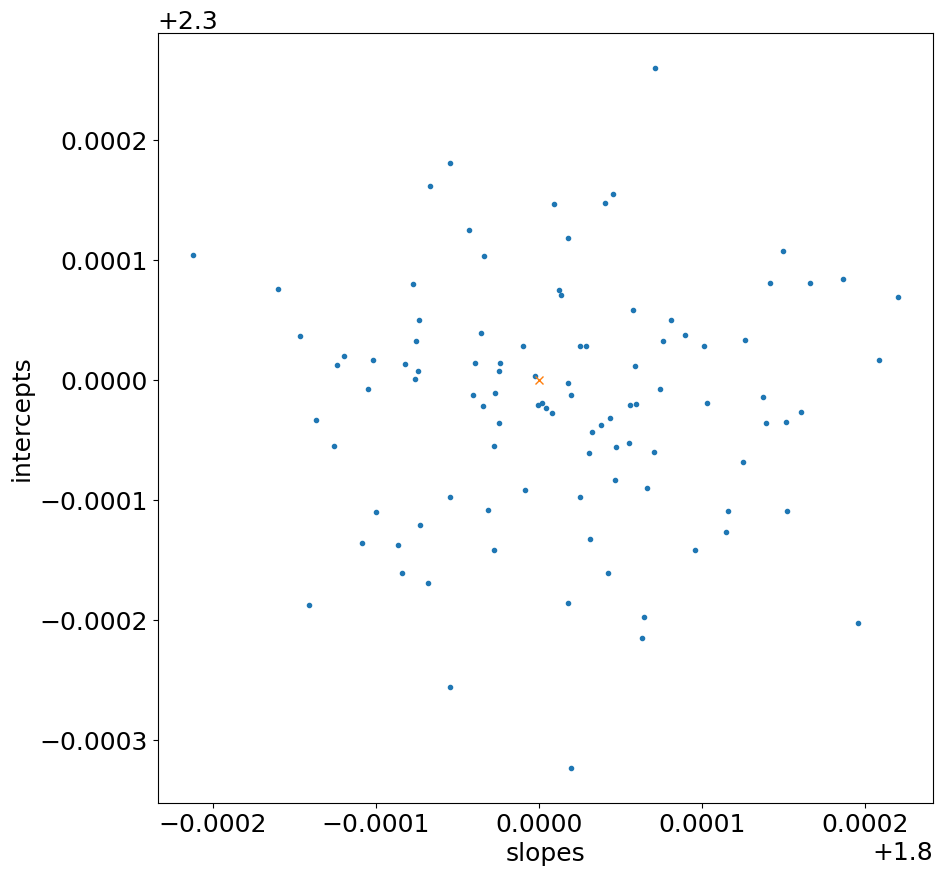

In [ ]:
pl.plot(np.array(pos)[:,0], np.array(pos)[:,1], '.')
pl.plot(m_true, b_true, 'x')
pl.xlabel("slopes")
pl.ylabel("intercepts")

In [ ]:
#create the sampler object
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))
#run the sampler model
sampler.run_mcmc(pos, nsteps);

In [ ]:
#this creates 100 chains of 100 steaps each, each exploring 2 variables
sampler.chain.shape

In [ ]:
#throw away the first 150 points and visualize the location of the chais at each step
samples = sampler.chain[:, 150:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["$m$","$intercept$"],
                      truths=[m_true, b_true])
pl.show()
print ("Fig 6: EMCEE with {0:d} chains of {0:d} steps  ".format(nwalkers, nsteps) +
       "- generative model truth indicated in blue")

In [ ]:
m_mcmc, b_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))

In [ ]:
mcmcRes = np.concatenate([m_mcmc, b_mcmc])
print ("MCMC result:\nslope\t\t{0:+.2f} ({1:.2f}, {2:.2f})\nintercept\t{3:.2f} ({4:.2f}, {5:.2f})".format(*mcmcRes))

MCMC result:
slope		+2.68 (0.20, 0.21)
intercept	-4.18 (1.99, 1.87)


In [ ]:
ax = pl.figure(figsize=(10,5)).add_subplot(111)
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.errorbar(x, y, yerr=yerr, fmt='k.')
ax.plot(pl.xlim(), line(m_mcmc[0], b_mcmc[0],  np.array(pl.xlim())), '-', alpha=0.8, lw=2)
ax.plot(pl.xlim(), line(m_true, b_true,  np.array(pl.xlim())), 'k-',
        alpha=0.8, lw=2, label="generative")
for m, b in samples[np.random.randint(len(samples), size=100)]:
    ax.plot(x, m*x+b, color="SteelBlue", alpha=0.05)
ax.legend(loc=2)
pl.show()
print ("Figure 8: a line generative model and the data it generates with Poisson errors augmented by Gaussian errors.\n" +
       "In blue model with the MCMC best fit parameters, "  +
       "identified as the median of the joint posterior distributions, is indicated.\n" +
       "In light blue shades the model with the best parameters for each chain is plotted")

# Comparison with analytical solution

In [ ]:
# linear algebra solution
A = np.vstack((np.ones_like(x), x)).T
C = np.diag(yerr * yerr)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))

In [ ]:
ax = pl.figure(figsize=(10,5)).add_subplot(111)
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.errorbar(x, y, yerr=yerr, fmt='k.')
ax.plot(pl.xlim(), line(m_mcmc[0], b_mcmc[0],  np.array(pl.xlim())), '-', alpha=0.8, lw=2)
ax.plot(pl.xlim(), line(m_true, b_true,  np.array(pl.xlim())), 'k-',
        alpha=0.8, lw=2, label="generative")
for m, b in samples[np.random.randint(len(samples), size=100)]:
    ax.plot(x, m*x+b, color="SteelBlue", alpha=0.05)
ax.plot(pl.xlim(), line(m_ls, b_ls,  np.array(pl.xlim())), '--',
        alpha=0.8, lw=2, label="OLS")
pl.legend();
print ("Figure 8: a line generative model and the data it generates with Poisson errors augmented by Gaussian errors.\n" +
       "In blue model with the MCMC best fit parameters, "  +
       "identified as the median of the joint posterior distributions, is indicated.\n" +
       "In light blue shades the model with the best parameters for each chain is plotted\n" +
       "In orange the anayltical solution (OLS) is indicated by a dashed line")

In [ ]:
pos = [np.array([m_ls, b_ls]) + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))
sampler.run_mcmc(pos, nsteps);

In [ ]:
samples = sampler.chain[:, 150:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["$m$","$intercept$"],
                      truths=[m_true, b_true])
pl.show()
print ("Fig 10: EMCEE with 100 chains of 100 steps  - generative model truth indicated in blue, the starting point was the OLS solution")


In [ ]:
m_mcmc, b_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))
mcmcRes = np.concatenate([m_mcmc, b_mcmc])
print ("MCMC result:\nslope\t\t{0:+.2f} ({1:.2f}, {2:.2f})\nintercept\t{3:.2f} ({4:.2f}, {5:.2f})".format(*mcmcRes))

MCMC result:
slope		+2.68 (0.20, 0.20)
intercept	-4.21 (1.92, 1.94)


# Test convergence by looking at the autocorrelation

In [ ]:
def acorr(x):
    ax = pl.figure(figsize=(10,5)).add_subplot(111)

    x = x - x.mean()

    autocorr = np.correlate(x, x, mode='full')
    autocorr = autocorr[x.size:]
    autocorr /= autocorr.max()

    return ax.stem(autocorr)

acorr(sampler.chain[0,:,0])
pl.show()
print ("Fig 11: Chain Autocorrelation")

# Increase the steps in the chain

In [ ]:
ndim, nwalkers, nsteps = 2, 100, 1500
pos = [np.array([m_ls, b_ls]) + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))
sampler.run_mcmc(pos, 1500);

In [ ]:
samples = sampler.chain[:, 150:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["$m$","$intercept$"],
                      truths=[m_true, b_true])
m_mcmc, b_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))
m_mcmc, b_mcmc

acorr(sampler.chain[0,:,0])
acorr(sampler.chain[1,:,0])
pl.show()
print ("Fig 12: Corner plot showing the joint posterior and chain autocorrelation for 2 longer chain of %d steps"%nsteps)

# underestimated uncertainties?
read section 6 https://arxiv.org/pdf/1008.4686.pdf

this example is developed here https://emcee.readthedocs.io/en/stable/tutorials/line/

a linear model

$\log{p(\vec{y}|\vec{x},\vec{y_{err}}, m,b)} \propto -\frac{1}{2}\sum_i {\frac{(y_i-(mx_i + b))^2}{y_{err,i}^2}}$

a linear model where the quoted uncertainties are underestimated by a constant fractional amount

$s^2 = y_{err}^2 + a^2(mx+b)^2$

$\log{p(\vec{y}|\vec{x},\vec{y_{err}}, m,b,a)} \propto -\frac{1}{2}\sum_i \left({\frac{(y_i-(mx_i + b))^2}{s_i^2}} + \log (2\pi s_i^2)\right)$

In [ ]:

def lnlike(theta, x, y, yerr):

    m, b, a = theta
    s2 = yerr ** 2 + line(m, b, x) ** 2 * a**2
    #return -0.5*(np.sum((line(m, b, x) - y)**2 / (s**2) + np.log(2*np.pi*s**2)))
    return -0.5*(np.sum((line(m, b, x) - y)**2 / (s2) + np.log(s2)))

In [ ]:
def lnprior(theta):
    m, b, a = theta
    if -10 < b < 10 and 0 < m < 10 and a >= 0:
        return 0.0
    return -np.inf

In [ ]:
ndim, nwalkers, nsteps = 3, 100, 1500
pos = [np.array([m_ls, b_ls, 0.01]) + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))
sampler.run_mcmc(pos, 1500);

In [ ]:
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
samples = sampler.chain[:, 150:, :].reshape((-1, ndim))
np.percentile(samples, [50], axis=0)

array([[ 2.75030491, -3.77701882,  0.39146039]])

In [ ]:
fig = corner.corner(samples, labels=["$m$","$intercept$", "a"],
                      truths=np.percentile(samples, [50],
                                               axis=0)[0]
                       )
m_mcmc, b_mcmc, a_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))
pl.show()
